<a href="https://colab.research.google.com/github/AnimeshKulshrestha/Ananlysis-on-Barabasi-Albert-Model-network/blob/main/BA_algo_SNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [3]:
import random
import networkx as nx
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

#Generating Scale Free Network

##Network Generation

In [4]:
Graph = nx.fast_gnp_random_graph(4,0.7)
M = 100
N = 10000

for index_val in range(5,N+1):
    Dist_degree_val = list(dict(Graph.degree()).values())
    Sum_degree_val = sum(Dist_degree_val)
    current_p = [degree_now / Sum_degree_val for degree_now in Dist_degree_val]
    connect_nodes = random.choices(list(Graph.nodes()), weights=current_p,k=M)
    
    Graph.add_node(index_val)
    for my_pointer in connect_nodes:
        Graph.add_edge(index_val,my_pointer)
 
    Dist_degree_val.append(len(connect_nodes))

print("The Number Of Nodes In Our Graph are : ", Graph.number_of_nodes())
print("The Number Of Edges In Our Graph Are :", Graph.number_of_edges())

The Number Of Nodes In Our Graph are :  10000
The Number Of Edges In Our Graph Are : 967339


#Degree Distribution

##Plotting the distribution

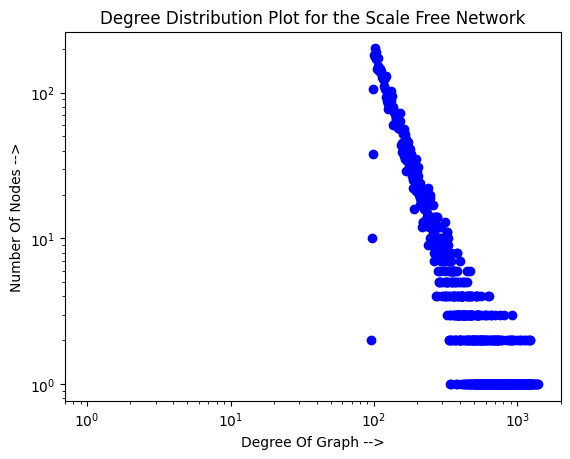

In [5]:
degrees_now = Graph.degree()
degree_max = 0
node_val = 0
for degree_value in degrees_now:
  if(degree_value[1]>degree_max):
    degree_max = degree_value[1]
    node_val = degree_value[0]

degree_dist_graph = nx.degree_histogram(Graph)

plt.loglog(range(len(degree_dist_graph)),degree_dist_graph, 'bo')
plt.xlabel('Degree Of Graph -->')
plt.ylabel('Number Of Nodes -->')
plt.title('Degree Distribution Plot for the Scale Free Network')
plt.show()

##Highest Degree Node

In [6]:
time_value = 0
if(node_val > 4):
  time_value = node_val - 4
print(f" NODE={node_val} Highest Degree Value={degree_max} Time Value ={time_value} Sec")

 NODE=22 Highest Degree Value=1394 Time Value =18 Sec


#Time - Degree plot

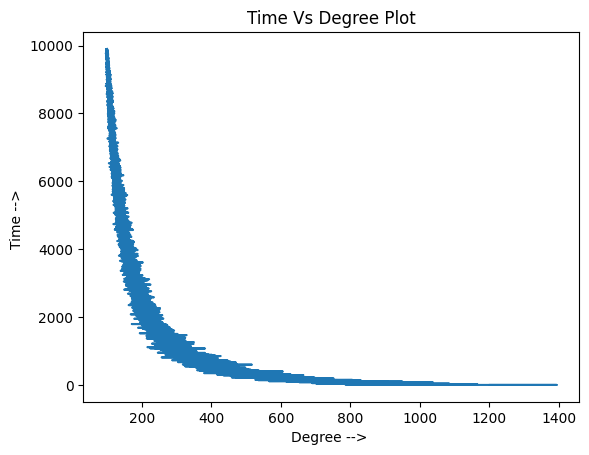

In [7]:
time_arr = []
degree_arr = []
for degree_val in degrees_now:
  x_val = degree_val[0]
  d_val = degree_val[1]
  t_val = 0
  if(x_val>M):
    t_val = x_val-M
  time_arr.append(t_val)
  degree_arr.append(d_val)
plt.plot(degree_arr,time_arr)
plt.xlabel('Degree --> ')
plt.ylabel('Time --> ')
plt.title('Time Vs Degree Plot')
plt.show()

#Centrality measures

##Finding centralities

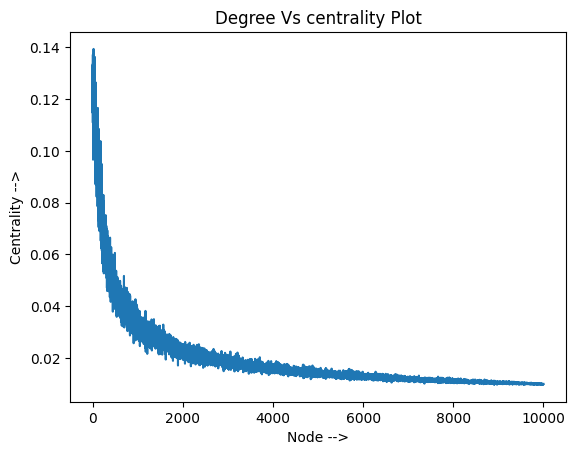

In [8]:
centeral_val = nx.degree_centrality(Graph)
x_val = list(centeral_val.keys())
y_val = list(centeral_val.values())
plt.plot(x_val,y_val)
plt.xlabel('Node -->')
plt.ylabel('Centrality -->')
plt.title('Degree Vs centrality Plot')
plt.show()

##Finding EigenVector

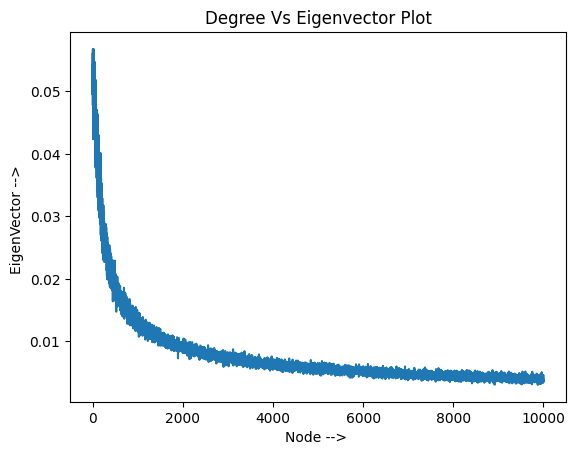

In [9]:
eigen_value_now = nx.eigenvector_centrality(Graph)
x_val = list(eigen_value_now.keys())
y_val = list(eigen_value_now.values())
plt.plot(x_val,y_val)
plt.xlabel('Node --> ')
plt.ylabel('EigenVector --> ')
plt.title('Degree Vs Eigenvector Plot')
plt.show()

##Finding Betweenness

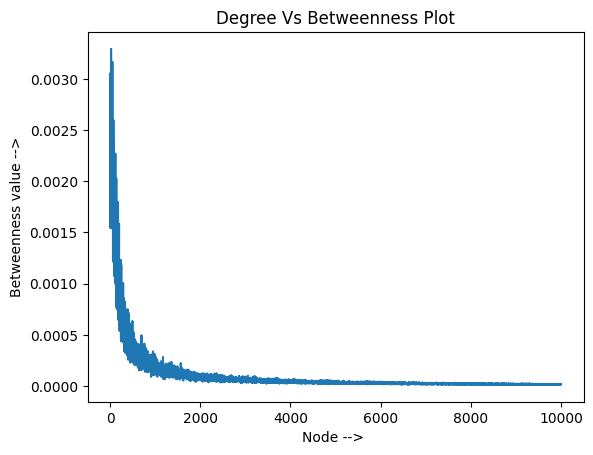

In [10]:
betweenness_value_now = nx.betweenness_centrality(Graph)
x_val = list(betweenness_value_now.keys())
y_val = list(betweenness_value_now.values())
plt.plot(x_val,y_val)
plt.xlabel('Node --> ')
plt.ylabel('Betweenness value -->')
plt.title('Degree Vs Betweenness Plot')
plt.show()

##Finding Closeness

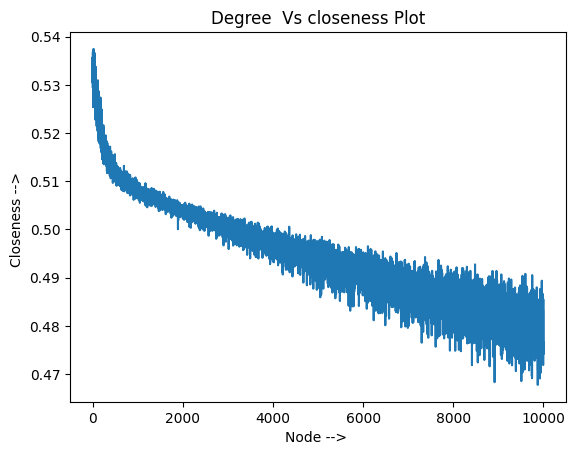

In [11]:
closeness_value_now = nx.closeness_centrality(Graph)
x_val = list(closeness_value_now.keys())
y_val = list(closeness_value_now.values())
plt.plot(x_val,y_val)
plt.xlabel('Node --> ')
plt.ylabel('Closeness --> ')
plt.title('Degree  Vs closeness Plot')
plt.show()

#Finding a giant component (not done)

In [12]:
giant_value_now = max(nx.connected_components(Graph), key=len)
print(len(giant_value_now))
my_ratio_val = len(giant_value_now)/len(Graph)
print(my_ratio_val)

10000
1.0


#Passing Informations

In [13]:
def spread_info(Graph, starting_node_value, p_val):
    visited_value = {starting_node_value}
    queue_data_store = [(starting_node_value, 0)]
    steps_val = 0
    visited_value_nodes = 1;
    while queue_data_store:
        node_val, dist_val = queue_data_store.pop(0)
        steps_val += 1
        for neighbor_val in Graph.neighbors(node_val):
            if neighbor_val not in visited_value:
                visited_value.add(neighbor_val)
                if random.random() < p_val:
                    queue_data_store.append((neighbor_val, dist_val+1))
                    visited_value_nodes+=1
    return visited_value_nodes, steps_val


p_values = [0.25, 0.5, 0.75, 1]
for p_val in p_values:
    print(f"Experiment for p value = {p_val}")
    total_steps_val = 0
    max_nodes = 1
    num_trials_required = 10
    visited_value_nodes = 1
    for i in range(num_trials_required):
        starting_node_value = random.choice(list(Graph.nodes))
        visited_value_nodes, steps_val = spread_info(Graph, starting_node_value, p_val)
        total_steps_val += steps_val
        if visited_value_nodes > max_nodes:
            max_nodes = visited_value_nodes
    avg_steps_val = total_steps_val / num_trials_required
    print(f"The average number of steps required are : {avg_steps_val:.2f}")
    print(f"The maximum number of nodes that can be reached are : {max_nodes}")

Experiment for p value = 0.25
The average number of steps required are : 2487.20
The maximum number of nodes that can be reached are : 2536
Experiment for p value = 0.5
The average number of steps required are : 5023.20
The maximum number of nodes that can be reached are : 5129
Experiment for p value = 0.75
The average number of steps required are : 7494.20
The maximum number of nodes that can be reached are : 7588
Experiment for p value = 1
The average number of steps required are : 10000.00
The maximum number of nodes that can be reached are : 10000
